In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import dice_ml
from dice_ml.utils import helpers 
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
def plotEverything(X,Y,classifier,title, obs, enemies):

    plot_decision_regions(X, Y, clf=classifier, legend=2)
    
    plt.scatter(obs[:,0], obs[:,1], c = 'lime',marker= 'x')
    plt.scatter(enemies[:,0], enemies[:,1], c = 'red', marker = 'o')
    # Adding axes annotations
    plt.title(title)
    plt.show()

In [3]:
data, labels = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=None)
dic = {'x': data[:,0], 'y': data[:,1], 'target': labels}
df = pd.DataFrame(dic)
target = df["target"]

train_dataset, test_dataset, y_train, y_test = train_test_split(df,
                                                                target,
                                                                test_size=0.2,
                                                                random_state=0,
                                                                stratify=target)
x_train = train_dataset.drop('target', axis=1)
x_test = test_dataset.drop('target', axis=1)



In [4]:

d = dice_ml.Data(dataframe=train_dataset, continuous_features=['x', 'y'], outcome_name='target')

clf =  RandomForestClassifier()
fittedClf = clf.fit(x_train, y_train)
# Using sklearn backend
m = dice_ml.Model(model=fittedClf, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method= 'random')


100%|██████████| 1/1 [00:00<00:00,  2.04it/s]
/home/manuel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


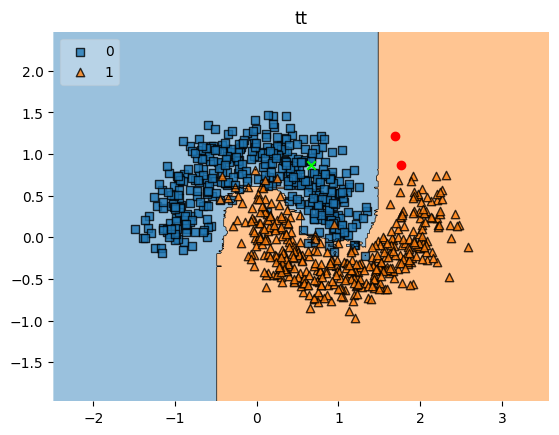

In [5]:

counterfactuals = exp.generate_counterfactuals(
    query_instances = x_test[0:1],
    total_CFs = 2,
    desired_class="opposite",
    proximity_weight=0.5,
    diversity_weight=0.5,
    features_to_vary="all",
    permitted_range=None,
    posthoc_sparsity_param=0.1)
plotEverything(x_train.to_numpy(),y_train.to_numpy(), fittedClf, 'tt', x_test[0:1].to_numpy(), counterfactuals.cf_examples_list[0].final_cfs_df[['x','y']].to_numpy())
